In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
most_recent_date = df.iloc[-1]['date']
most_recent_date

'2021-05-09'

### Countries with the most cases

In [4]:
total_cases = df[['date', 'location', 'total_cases', 'total_deaths']]
total_cases = total_cases.loc[total_cases['date'] == most_recent_date]
total_cases = total_cases.sort_values(by='total_cases', ascending=False)
total_cases = total_cases.drop(total_cases.index[[0, 1, 2, 5, 6]]) # not countries

most_affected_countries = total_cases[1:11]
most_affected_countries

,date,location,total_cases,total_deaths
83038,2021-05-09,United States,32707641.0,581754.0
36288,2021-05-09,India,22296414.0,242362.0
11601,2021-05-09,Brazil,15184790.0,422340.0
28926,2021-05-09,France,5838294.0,106553.0
80692,2021-05-09,Turkey,5031332.0,43029.0
65028,2021-05-09,Russia,4824621.0,111425.0
892,2021-05-09,Africa,4632506.0,124394.0
82564,2021-05-09,United Kingdom,4450578.0,127865.0
39525,2021-05-09,Italy,4111210.0,122833.0
74154,2021-05-09,Spain,3567408.0,78792.0


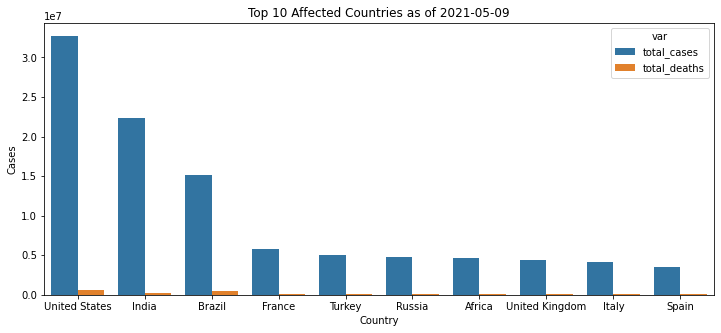

In [5]:
tidy = pd.melt(most_affected_countries, id_vars = ['location'],  value_vars=['total_cases', 'total_deaths'], 
               var_name='var', value_name='Cases')
plt.figure(figsize=(12, 5))
sns.barplot(x="location", hue="var", y="Cases", data=tidy)
plt.title(f'Top 10 Affected Countries as of {most_recent_date}')
plt.xlabel('Country')
plt.show()

### New cases over the past two months

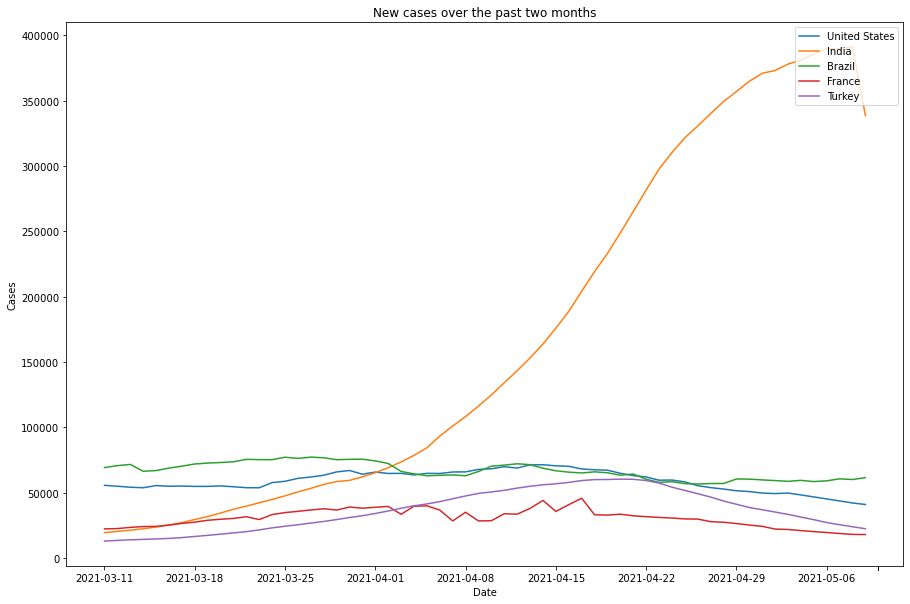

In [6]:
countries = most_affected_countries['location'].values[:5]

plt.figure(figsize=(15, 10))

for country in countries:
    location = df.loc[df['location'] == country].iloc[-60:]
    plt.plot(location['date'], location['new_cases_smoothed'], label=country)

dates = df.loc[df['location'] == 'United States']['date'][-60:]
plt.xticks([dates.iloc[i] if i % 7 == 0 else '' for i in range(len(dates))])
plt.title("New cases over the past two months")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(loc="upper right")
plt.show()

### Countries with the highest testing rate

In [7]:
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]

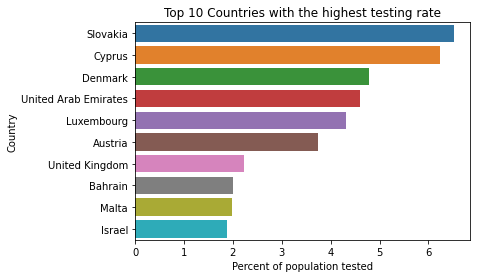

In [8]:
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "horizontal")
plt.title('Top 10 Countries with the highest testing rate')
plt.xlabel('Percent of population tested')
plt.ylabel('Country')
plt.show()